## Quardtree

**Quardtree** *(или квадродерево)* - дерево, каждая внутренняя вершина которого содержит 4 ребёнка. Каждой вершине  квадродерева соответствует некоторый квадрат. Если внутренней вершине $v$ соответствует какой-то квадрат $a$, то её детям этой вершины соответствуют четверти квадрата $a$. В нашем случае в листах будут храниться координаты точки на плоскости. 

Пусть дано множество точек $P$, для которого нужно построить квадродерево. Начнём с некоторого квадрата $\sigma$, содержащего все точки из $P$ (eсли он не дан явно, его можно легко найти за линейное время от числа вершин). Пусть $\sigma = (x_0, x_1] \times (y_0, y_1]$. Обозначим $x_m = \left(x_0 + x_1 \right) / 2$; $y_m = (y_0 + y_1) / 2$. Тогда:

* если $P$ не содержит точек, то корнем квадродерева будет лист, в котором в качестве координат точки будет храниться `NULL`;
* если $P$ содержит 1 точку то корнем квадродерева будет лист, в котором хранятся координаты единственной точки из $P$;
* иначе корнем дерева будет вершина $v$, которой соответствует квадрат $\sigma$, а её детям —  $v_{NE}$, $v_{NW}$, $v_{SW}$, $v_{SE}$ будут соответствовать квадраты $\sigma_{NE} = (x_m, x_1] \times (y_m, y_1]$, $\sigma_{NW} = (x_0, x_m] \times (y_m, y_1]$, $\sigma_{SW} = (x_0, x_m] \times (y_0, y_m]$, $\sigma_{SE} = (x_m, x_1] \times (y_0, y_m]$. Теперь таким же образом рекурсивно превращаем каждого ребёнка в квадродерево для множества точек, лежащих в соответствующих четвертях.

## Composed Quardtree

Обычное квадродерево может иметь слишком большую глубину независимо от количества точек. Сжатое дерево лишено данного недостатка и имеет глубину $O(n)$

Назовём квадрат **интересным**, если соответствующая ему вершина дерева имеет хотя бы 2 непустых ребёнка (то есть таких, что в их квадратах содержится хотя бы одна точка) или является корнем. Понятно, что любой квадрат, содержащий хотя бы две точки, содержит в себе хотя бы 1 интересный квадрат. Поправка на то, что корень является интерсным квадратом, не обязательна, но на практике удобнее, чтобы дерево содержало хотя бы 1 интересный квадрат.

Сжатое квадродерево получается сжатием обычного таким образом, чтобы остались только интересные квадраты. Пустые дети неинтересных квадратов удаляются. Для каждого интересного квадрата p будем хранить 4 указателя для каждой четверти этого квадрата. Если четверть содержит две или более точки, то указатель ссылается на наибольший интересный квадрат в этой четверти. Если четверть содержит одну точку, то указатель ссылается на эту точку. Наконец, если четверть не содержит точек, то указатель сделаем нулевым.

**Лемма (О высоте сжатого квадродерева) :**
Сжатое квадродерево для $n$ точек имеет $O(n)$ вершин и глубину $O(n)$.

**Док-во**.
Доказать оценку $O(n)$ для числа интересных квадратов. Докажем по индукции, что в квадродереве для $n$ точек количество интересных квадратов меньше либо равно $n$:

* для $n = 1$ это очевидно;
* пусть доказано для квадродерева с $n - 1$ точек. Добавим новую точку $x$: сначала найдём наименьший интересный квадрат $p$, который её содержит. Если $x$ находится в его пустой четверти, то просто добавляем $x$ как лист, не изменив число интересных квадратов. Если же четверть $p$ в которую необходимо вставить $x$, уже содержит точку $y$, то мы можем добавить в дерево интересный квадрат, который будет содержать $x$ и $y$ в разных четвертях. Таким образом, при добавлении точки мы увеличиваем количество интересных квадратов не более, чем на один.

Таким образом, квадродерево для $n$ точек имеет $O(n)$ вершин. Глубина, очевидно, тоже $O(n)$, поскольку на каждом уровне есть хотя бы одна вершина.

### Операции над Composed Quardtree

**Локализация**: Под локализацией подразумевается поиск наименьшего интересного квадрата, где геометрически находится интерсующая точка. Это делается просто: начиная с корня, идём вниз по дереву в те четверти, где геометрически лежит точка.

Работает за высоту дерева, то есть, за $O(n)$.

**Вставка**: Сначала локализуемся, находим наименьший квадрат, в который надо вставиться, понимаем, в какую четверть будем вставляться. Рассмотрим эту четверть:

* Если эта четверь пустая (указатель, где храниться координата == `NULL`), то просто запоминаем координаты вершины в этом листе.
* Если там есть точка (или интересный квадрат), то заменяем этот лист, на новый интересный квадрат, который в четвертях содержит эти точки (или точку и интересный квадрат). Нам этом шаге, самое главное - правильно вычислить рамки нового квадрата.

**Удаление**: Сначала локализуемся, находим наименьший интресный квадрат, в котором может лежать искомая точка. Если в четвертях храниться указатель на координаты нашей точки - удаляем их. После нашей операции, наш квдарат может перестать быть интересным. При этом, родитель нашего квадрата в любом случае останется интересным. В таком случае нам надо просто заменить наш квадрат на его единственного непустого ребенка.

---

Таким образом, все операции на сжатом квадродерве выполняются за $O(n)$. Это ничем не лучше по ассимптотике, чем хранить точки просто в векторе. Тем не менее, это структура нам понадобиться для реализации **skip quardtree**, 

In [1]:
import numpy.random as rnd
import enum
from utils.view import display_cqtree_dump

In [2]:
class Quarter(enum.Enum):
    """Индекс четверти в квадрате"""
    LT = 0
    LB = 1
    RT = 2
    RB = 3

def contains(bounds, point):
    """Возращает true, если point лежит внутри bounds"""
    x, y = point
    left, right, bottom, top = bounds
    return x > left and x <= right and y > bottom and y <= top 

# Функции для получении рамок четверти квадрата по индексу четверти
bounds_quarter = {}
bounds_quarter[Quarter.LT] = lambda b: (b[0], (b[0] + b[1]) / 2, (b[2] + b[3]) / 2, b[3])
bounds_quarter[Quarter.LB] = lambda b: (b[0], (b[0] + b[1]) / 2, b[2], (b[2] + b[3]) / 2)
bounds_quarter[Quarter.RT] = lambda b: ((b[0] + b[1]) / 2, b[1], (b[2] + b[3]) / 2, b[3])
bounds_quarter[Quarter.RB] = lambda b: ((b[0] + b[1]) / 2, b[1], b[2], (b[2] + b[3]) / 2)

def quarter_by(bounds, point):
    """Получаем четверть квадрата bounds, в которой находится point"""
    if not contains(bounds, point):
        return None
    x, y = point
    left, right, bottom, top = bounds
    x_mid = (left + right) / 2
    y_mid = (bottom + top) / 2
    if x <= x_mid:
        if y <= y_mid:
            return Quarter.LB
        else:
            return Quarter.LT
    else:
        if y <= y_mid:
            return Quarter.RB
        else:
            return Quarter.RT

def compressed_by(bounds, a, b):
    # Получаем рамки интересного квадрата по точкам, которые он содержит
    a_qt = quarter_by(bounds, a)
    b_qt = quarter_by(bounds, b)
    if a_qt == b_qt:
        # bounds задают неинтерсный квадрат, значит его квадрат в его четверти - интересный
        return compressed_by(bounds_quarter[a_qt](bounds), a, b)
    return bounds, a_qt, b_qt

class CQTreeNode:
    """Представление узла в квадродереве"""
    
    def __init__(self, bounds=None, children=None, data=None):
        self.bounds = bounds
        self.children = children
        self.data = data
    
    def simple(self):
        """Тест на проостоту узла. False - значит узел содержит интересный квадрат."""
        return self.children is None
    
    def empty(self):
        """Тест на пустоту узла"""
        return (self.children is None) and (self.data is None)
    
    def add(self, point, bounds):
        # Добавляем точку в простой узел
        if not self.simple():
            return
        if (self.data is None):
            # Узел не содержит точку - просто добавим
            self.data = point
        else:
            if self.data == point:
                return
            # Узел содержит точку - создадим интересный квадрат по 2 точкам
            compressed_bounds, qt_p1, qt_p2 = compressed_by(bounds, self.data, point)
            # Инициализируем необходимые для хранения интресного квадрата поля
            self.bounds = compressed_bounds
            self.children = {}
            for qt in Quarter:
                self.children[qt] = CQTreeNode(bounds_quarter[qt](self.bounds), None, None)
            self.children[qt_p1].data = self.data
            self.children[qt_p2].data = point
            self.data = None
            
    def replace_with(self, node):
        # Перевещиваем узлы
        self.data = node.data
        self.bounds = node.bounds
        self.children = node.children
                
def combine(node, point, bounds):
    # Создаем новый интересный квадрат по непростому узлу и точке
    compressed_bounds, qt_point, qt_node = compressed_by(bounds, point, (node.bounds[1], node.bounds[3]))
    new_node = CQTreeNode(compressed_bounds, {}, None)
    for qt in Quarter:
        if qt == qt_point:
            new_node.children[qt] = CQTreeNode(None, None, point)
        elif qt == qt_node:
            new_node.children[qt] = node
        else:
            new_node.children[qt] = CQTreeNode(None, None, None)
    return new_node

class CQTree:
    """Реализация сжатого квадродерева"""
    
    def __init__(self, bounds):
        root_children = {}
        self.root = CQTreeNode(bounds, root_children)
        for qt in Quarter:
            root_children[qt] = CQTreeNode(bounds_quarter[qt](bounds), None, None)
        # Ассоциативный массив из интересных квадратов в содержащие их узлы
        self.ref = {bounds: self.root}

    def localize(self, point, start=None):
        """Локализация: возвращает узел, содержащий минимальный интересный квадрат, где находится point"""
        if start is None:
            start = self.root
        # Проверка на то, что точка геометрически лежит в этом дереве
        if not contains(start.bounds, point):
            return None

        current = start
        while True:
            # Понимаем в какой четверти текущего узла лежит точка
            qt = quarter_by(current.bounds, point)
            child = current.children[qt]
            if contains(child.bounds, point) & (not child.simple()):
                # Точка также лежит в интересном ребенке - спускаемся ниже по дереву
                current = child
            else:    
                return current
    
    def insert(self, point):
        """Вставка точки в квадродерево"""
        node = self.localize(point)
        if node is None:
            return
        self.insertInternal(point, node)
            
    def remove(self, point):
        """Удаление точки из квадродерева"""
        node = self.localize(point)
        if node is None:
            return
        self.removeInternal(point, node)
    
    def insertInternal(self, point, node):
        qt = quarter_by(node.bounds, point)
        child = node.children[qt]
        if child.simple():
            # Добавляем точку в простой узел
            child.add(point, bounds_quarter[qt](node.bounds))
            # После этого узел может перестать быть простым, и уже будет содержать интересный квадрат
            if not child.simple():
                self.ref[child.bounds] = child     # Обновим ref
        else:
            # В узле уже лежит ссылка на интересный квадрат
            # Надо создать новый квадрат, который будет содержить текущий квадрат и новую точку
            new_child = combine(child, point, bounds_quarter[qt](node.bounds))
            node.children[qt] = new_child          # Вставим в дерево
            self.ref[new_child.bounds] = new_child # Обновим ref
            
    def removeInternal(self, point, node):
        qt = quarter_by(node.bounds, point)
        child = node.children[qt]
        if child.simple():
            # Проверяем лежит ли point в этом узле
            if child.data is not None and child.data == point:
                child.data = None
                # После удаления точки, квадрат, соотвествующий node, мог стать неинтересным
                if node == self.root:
                    # Корень по определению интересный
                    return
                become_simple = True
                non_empty_child = None
                for child in node.children.values():
                    if not child.empty():
                        if non_empty_child is None:
                            non_empty_child = child
                        else:
                            become_simple = False
                            break
                if become_simple:
                    del self.ref[node.bounds]          # Обновим ref
                    node.replace_with(non_empty_child) # Удалим из дерева
    
    def empty(self):
        for root_child in self.root.children.values():
            if not root_child.empty():
                return False
        return True
    
    

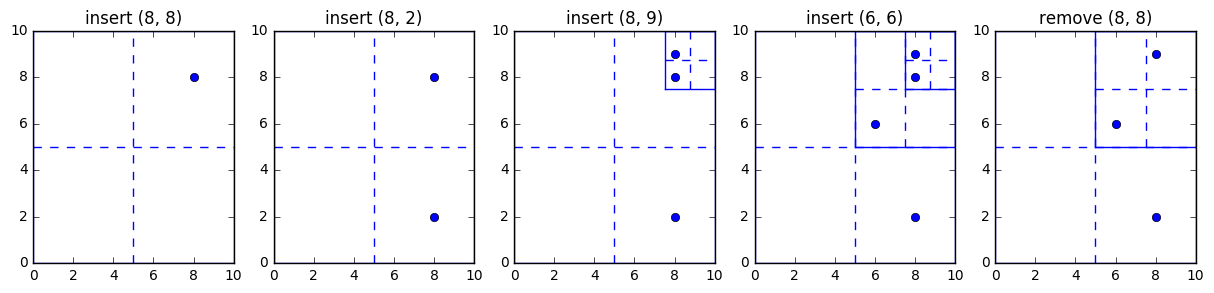

In [3]:
# Пример работы сжатого квадродерева
# Можно запустить и посмотреть на состояния дерева после каждой операции

ops = [
    ('insert', 8, 8),
    ('insert', 8, 2),
    ('insert', 8, 9),
    ('insert', 6, 6),
    ('remove', 8, 8)
]
    
tree = CQTree((0, 10, 0, 10))
display_cqtree_dump(tree, ops)

## Skip Quardtree

**skip quardtree** - структура данных, основанная на идее структуры **skip list**, позволяющая хранить множество точек и быстро производить над ним операции, такие как локализация, вставка и удаление. Здесь мы рассмотри одну из реализаций - **randomized skip quardtree**.

Построим **randomized skip quardtree** для заданного множества точек $S$:

Рассмотрим последовательность вложенных подмножеств $\{S_i\}$ множества $S$. Пусть $S_0 = S$; $S_i$ - подмножество $S_{i-1}$, причем каждый элемент из $S_{i-1}$ входит в $S_{i}$ с вероятностью $p \in (0, 1)$. **randomized skip quadtree** для множества $S$ будет состоять из набора $\{Q_i\}$, где $Q_i$ — сжатое квадродерево над множеством $S_i$. Будем называть эти квадродеревья уровнями, при этом нулевой уровень содержит все точки из $S$.

Также мы должны уметь из верншины с i-го уровня перемещаться на соотвестсвущую ей вершину на i-1-ом уровне. Это можно делать несколькими способами:
    
* Просто хранить ссылку внутри вершины.
* Каждый уровень будет хранить ассоциативный массив из масок в вершины. Маску для вершину можно однозначно задать по её коордианатам.

### Локализация

Локализация происходит так же как и в обычных **quardtree**.
Сначала локализуемся в наивысшем уровне, начиная с `root`-вершины. Из полученной вершины переходим в соотвествующую ей вершину на предыдущем уровне. Снова запускаем локализацию, но теперь не из `root`'а, а из вершины, полученной предыдущей локализацией. Повотряем процесс пока не локализуемся в нулевом слое.

Идеологически это похоже на **skip list**: мы пользуемся тем, что локализация в **quardtree** происходит за линейное время (чем меньше точек в квадродереве тем, быстрее проходит операция), и сначала пытаемся локализоваться на том уровне, где меньше всего точек, а потом, при необходимости, спускаемся на уровнень ниже, и продолжаем операцию. Ниже показано, что локализация подобным образом имеет ассимптотику $O(\log n)$.

### Вставка

1. Локализация. В процессе локализации будем для каждого уровня запоминать вершину, на которой остановилась локализация внутри этого уровня.
2. Вставка точки в нулевой слой, в вершину, полученную локализацией из п.1.
3. С вероятностью $p$, переходим на уровень выше к вершине, которую мы запомнили в п.1, вставляем точку в эту вершину.
4. В случае удачи повторяем п.3, в случае неудачи завершаем операцию.
5. Если мы хотим перейти к слою которого нет, создаем новый слой, вствляем туда новую точку и завершаем операцию.

### Удаление

Запускаем локализацию. В процессе локализации будем удалять точку на всех уровнях, где она есть. Если на уровне стало ноль точек - удаляем уровень.

### Оценка времени работы
Такой сложный способ хранения множества точек дает нам бонус в скорости выполнения операций над ним. Из лемм ниже следует что время выполнения локализации оценивается в $O(\log n)$. Вставка и удаление также работает за $O(\log n)$, т.к. на каждом слое происходит не более $O(1)$ операций (добавление / удаление вершины в квадродерево).

**Лемма (О количестве шагов локализации на одном уровне):**
На каждом уровне совершается $O(1)$ шагов локализации для любой точки `x`.

**Док-во:**
Пусть в на `i`-ом уровне поиск точки `x`, начинающийся с корня, проходит по квадратам $p_0, p_1 \dots p_m$. Пусть случайная величина $j$ — количество шагов локализации внутри $Q_i$, тогда $p_{m - j}$ — последний квадрат из $p_0, p_1 \dots p_m$, являющийся интересным в $Q_{i + 1}$.

Оценим мат.ожидание случайной величины $j$. Пусть $T$ - множество встреченных на пути $p_{m - j + 1} \dots p_m$ непустых четвертинок. Чтобы $p_{m - j}$ был последним из $p_0, p_1 \dots p_m$ интересным квадратом в $Q_{i + 1}$ небходимо, чтобы среди $T$ только одна (вероятность этого назовём $Pr_1$) или ноль (вероятность этого назовём $Pr_0$) были непустыми в $Q_{i + 1}$. Иначе, если будет хотя бы пара непустых четвертинок, то их наименьший общий предок в дереве будет интересным квадратом и будет находиться глубже $p_{m - j}$. Таким образом, искомая вероятность не превосходит $Pr_0 + Pr_1$.

Пусть $|T| = t$, $q = 1 - p$.

$Pr_0 = q^t$, потому что $Pr_0$ означает то, что ни одна точка из $T$ не попала на уровень выше.

$Pr_1 = t \cdot pq^{t-1}$, потому что $Pr_1$ означает то, что ровна одна точка из $T$ не попала на уровень выше.

$Ej = \sum\limits_{j = 1}^{m} j \cdot Pr(j) = \sum\limits_{j = 1}^{m} j \left(q^t + t \cdot pq^{t-1}\right) = \sum\limits_{j = 1}^{m} j ((1-t) \cdot q^t + t \cdot q^{t-1}) $

В интересной вершине как минимум 2 непустые четверти (в одну из которых мы переходим), всего на пути $j$ интересных вершин, следственно, количество вершин в $T$ - хотя бы j. Следственно, количество точек в $T$ - тоже хотя бы j.

$ Ej                                                                         
\leq \sum\limits_{j = 1}^{m} j ((1-j) \cdot q^j + t \cdot q^{j-1})
<    \sum\limits_{j = 1}^{\infty} j ((1-j) \cdot q^j + j \cdot q^{j-1})
<    \sum\limits_{j = 1}^{\infty}( 2 j (j-1) \cdot q^{j-1} - j (j-1) \cdot q^j)
<    \sum\limits_{j = 1}^{\infty} 2 j (j-1) \cdot q^{j-1}
=    2 \sum\limits_{j = 1}^{\infty} (q^{j+1})''
=    2 (\sum\limits_{j = 1}^{\infty} q^{j+1})''
=    (2 q^2 / (1 - q))''
=    2p^{-3}
$

Получаем, $Ej < 2p^{-3}$. Следственно, $Ej = O(1)$. 

**Лемма (О количестве уровней):** 
Количество уровней - $O(\log n)$

**Док-во:**
Пусть $h$ - cлучайная величина, обозначающая количество уровней.

Оценим $p(h = k)$. 

$p(h = k) = p(h < k + 1) - p (h < k)$

$p(h < k) = (1 - p^k)^n$, потому что вероятность того, что при добавлении точка дойдет до уровня $k$ равняется $p^k$.

$p(h = k) = (1 - p^{k + 1})^n - (1 - p^k)^n < 1 - (1 - p^k)^n < np^k$

Оценим мат.ожидание $h$:

$ Eh
= \sum\limits_{k = 1}^{\infty}k \cdot p(h = k)
= \sum\limits_{k = 1}^{\log_{1/p}(n)}k \cdot p(h = k)
+ \sum\limits_{k = \log_{1/p}(n) + 1}^{\infty}k \cdot p(h = k)
$

Первая сумма:
$ \sum\limits_{k = 1}^{\log_{1/p}(n)}k \cdot p(h = k) 
< \sum\limits_{k = 1}^{\log_{1/p}(n)}\log_{1/p}(n) \cdot p(h = k)
= \log_{1/p}(n) \cdot \sum\limits_{k = 1}^{\log_{1/p}(n)} p(h = k)
= O(\log n)
$

Вторая сумма:
$ \sum\limits_{\log_{1/p}(n) + 1}^{\infty}k \cdot p(h = k)
< \sum\limits_{\log_{1/p}(n) + 1}^{\infty}k \cdot np^k 
< \sum\limits_{\log_{1/p}(n)}^{\infty}k \cdot np^k
= n \cdot \sum\limits_{\log_{1/p}(n)}^{\infty}k p^k
= n p^{\log_{1/p} n} \cdot \sum\limits_0^{\infty} (k + \log_{1/p} n) \cdot p^k
= n p^{\log_{1/p} n} \cdot (\sum\limits_0^{\infty} k p^k + \log_{1/p} n \sum\limits_0^{\infty} p^k)
= n p^{\log_{1/p} n} \cdot (O(1) + \log_{1/p} n \cdot O(1))
= O(\log n)
$

Cледственно, **skip quardtree** в среднем содержит $O(\log n)$ уровней.

### Оценка памяти

Для хранения **skip quardtree** необходимо $O(n)$ памяти

**Док-во:**
Сжатое квадродерево для $n$ точек занимает $O(n)$ памяти. На нулевом уровне $n$ точек. На следующем уровне $O(p n)$ точек, дальше $O(p^2 n)$ и так далее.
В итоге получаем $\sum\limits_0^{O(\log n)} O(p^k n) < \sum\limits_0^{\infty} O(p^k n) = O(n) $.

In [4]:

p = 0.5

def success():
    """С вероятность p возращает True"""
    return rnd.choice([False, True], p=[1-p, p])

class SkipQTree:
    """Реализация skip quardtree"""
    
    def __init__(self, bounds):
        self.bounds = bounds
        self.levels = []

    def insert(self, point):
        if len(self.levels) > 0:
            # Локализация в последнем уровне
            level_index = len(self.levels) - 1
            level = self.levels[level_index]
            node = level.localize(point)
            nodes = [node]
            # Поуровневая локализация
            while level_index != 0:
                level_index -= 1
                level = self.levels[level_index]
                # Используем результат предыдущей локализации
                new_node = level.ref[nodes[-1].bounds]
                nodes.append(level.localize(point, new_node))
            nodes.reverse()
        else:
            nodes = []
        
        #Добавляем точку
        level_index = 0
        while True:
            if level_index < len(self.levels):
                # Вставляем точку в ноду, полученную при локализации
                node = nodes[level_index]
                level = self.levels[level_index]
                level.insertInternal(point, node)
                if success():
                    # Переходим на уровень выше
                    level_index += 1
                else:
                    return
            else:
                # Создаем новый уровень, который будет содержать только добавленную вершину
                new_level = CQTree(self.bounds)
                self.levels.append(new_level)
                new_level.insert(point)
                return
    
    def remove(self, point):
        if len(self.levels) > 0:
            # Локализация в последнем уровне
            level_index = len(self.levels) - 1
            level = self.levels[level_index]
            node = level.localize(point)
            bounds = node.bounds
            # Удаляем точку с уровня
            level.removeInternal(point, node)
            # Поуровневая локализация
            while level_index != 0:
                level_index -= 1
                level = self.levels[level_index]
                # Используя результат предыдущей локализации, делаем локализацию на текущем уровне
                node = level.localize(point, level.ref[bounds])
                bounds = node.bounds
                # Удаляем точку с уровня
                level.removeInternal(point, node)
            
            if self.levels[-1].empty():
                # Удаляем последний пустой уровень
                del self.levels[-1]
                

In [5]:
# Пример работы skip quardtree
# Можно запустить и посмотреть на состояния дерева после каждой операции

def debug_skipqtree(tree):
    print("debug skip quardtree: levels - {}".format(len(tree.levels)))
    for i in range(0, len(tree.levels)):
        print("Level {}:".format(i))
        debug_cqtree(tree.levels[i])

def skipqtree_test_insert(tree, point):
    print("Insert {}".format(point))
    tree.insert(point)
    debug_skipqtree(tree)
    print()

def skipqtree_test_remove(tree, point):
    print("Remove {}".format(point))
    tree.remove(point)
    debug_skipqtree(tree)
    print()
        
tree = SkipQTree((0, 10, 0, 10))

tree.insert((8, 8))
tree.insert((8, 2))
tree.insert((8, 9))
tree.insert((6, 6))
tree.remove((8, 8))

print(tree)